## Dimitrios Megkos - 210034034
### Machine Learning Coursework - White wine quality classification
#### Explorative data analysis and data cleaning

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE

In [3]:
#load red wine dataset
wine = pd.read_csv('winequality-white.csv',sep=';')
wine.shape

(4898, 12)

In [4]:
#check information and null values
wine.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
wine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

Number of unique quality classes: 7


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

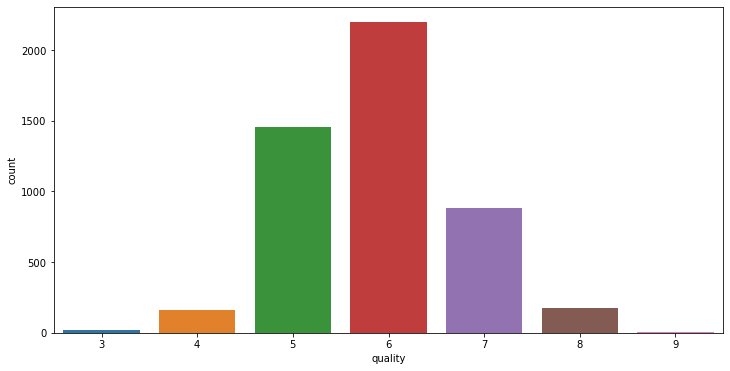

In [5]:
#check number of quality classes
print('Number of unique quality classes: '+str(wine['quality'].nunique()))
#get how many of each class
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=wine);
wine['quality'].value_counts()

In [6]:
#categories binned to 0 (not good) and 1 (good) to make this a
#binary classification problem
category = pd.cut(wine.quality,bins=[0,6,9],labels=['0','1'])
wine.insert(12,'wine quality',category)
#drop old quality column
wine=wine.drop(columns='quality')

Number of unique quality classes: 2


0    3838
1    1060
Name: wine quality, dtype: int64

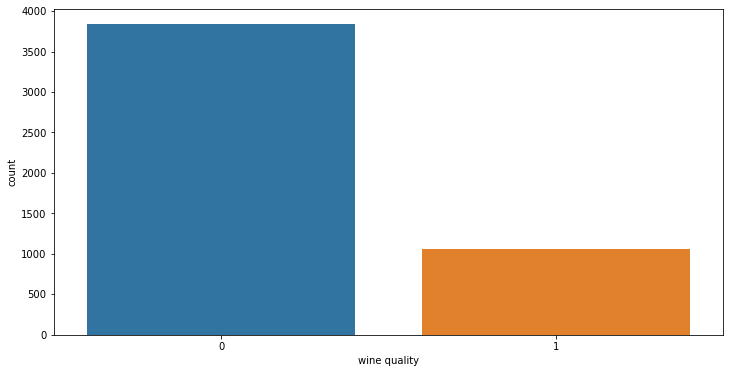

In [7]:
#check number of quality classes after bining
print('Number of unique quality classes: '+str(wine['wine quality'].nunique()))
#get how many of each class
plt.figure(figsize=(12, 6))
sns.countplot(x="wine quality", data=wine);
wine['wine quality'].value_counts()

There is a big class imbalance in this dataset. Some machine learning algorithms can be affected by class imbalance and require extra pre processing steps (SMOTE, Stratified K-Fold cross validation). However, some algorithms are not affected by this and do not require extra steps before training.

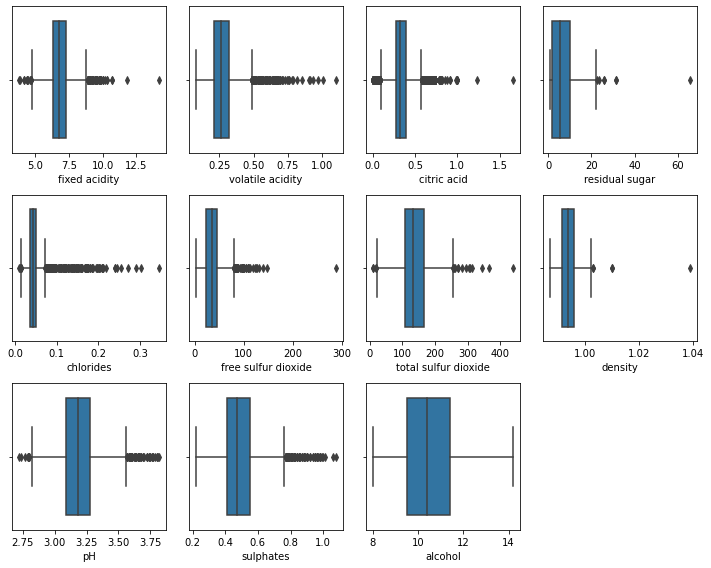

In [8]:
#check for outliers 
fig, axes = plt.subplots(3,4, figsize=(10,8))
sns.boxplot(ax=axes[0,0],x="fixed acidity", data=wine)
sns.boxplot(ax=axes[0,1],x="volatile acidity", data=wine)
sns.boxplot(ax=axes[0,2],x="citric acid", data=wine)
sns.boxplot(ax=axes[0,3],x="residual sugar", data=wine)
sns.boxplot(ax=axes[1,0],x="chlorides", data=wine)
sns.boxplot(ax=axes[1,1],x="free sulfur dioxide", data=wine)
sns.boxplot(ax=axes[1,2],x="total sulfur dioxide", data=wine)
sns.boxplot(ax=axes[1,3],x="density", data=wine)
sns.boxplot(ax=axes[2,0],x="pH", data=wine)
sns.boxplot(ax=axes[2,1],x="sulphates", data=wine)
sns.boxplot(ax=axes[2,2],x="alcohol", data=wine)
fig.delaxes(axes[2,3])
plt.tight_layout()

In [9]:
#drop outliers based on the boxplot above
wine = wine.drop(wine[wine["fixed acidity"] > 11].index)
wine = wine.drop(wine[wine["volatile acidity"] > 1.0].index)
wine = wine.drop(wine[wine["citric acid"] > 1.20].index)
wine = wine.drop(wine[wine["residual sugar"] > 21].index)
wine = wine.drop(wine[wine["chlorides"] > 0.23].index)
wine = wine.drop(wine[wine["free sulfur dioxide"] > 150].index)
wine = wine.drop(wine[wine["total sulfur dioxide"] > 340].index)
wine = wine.drop(wine[wine["density"] > 1.003].index)
wine = wine.drop(wine[wine["pH"] < 2.8].index)
wine = wine.drop(wine[wine["sulphates"] > 1.05].index)

In [10]:
#get how many of each class after dealing with outliers
print('Wines per quality without outliers:')
wine['wine quality'].value_counts()

Wines per quality without outliers:


0    3805
1    1059
Name: wine quality, dtype: int64

<Figure size 432x288 with 0 Axes>

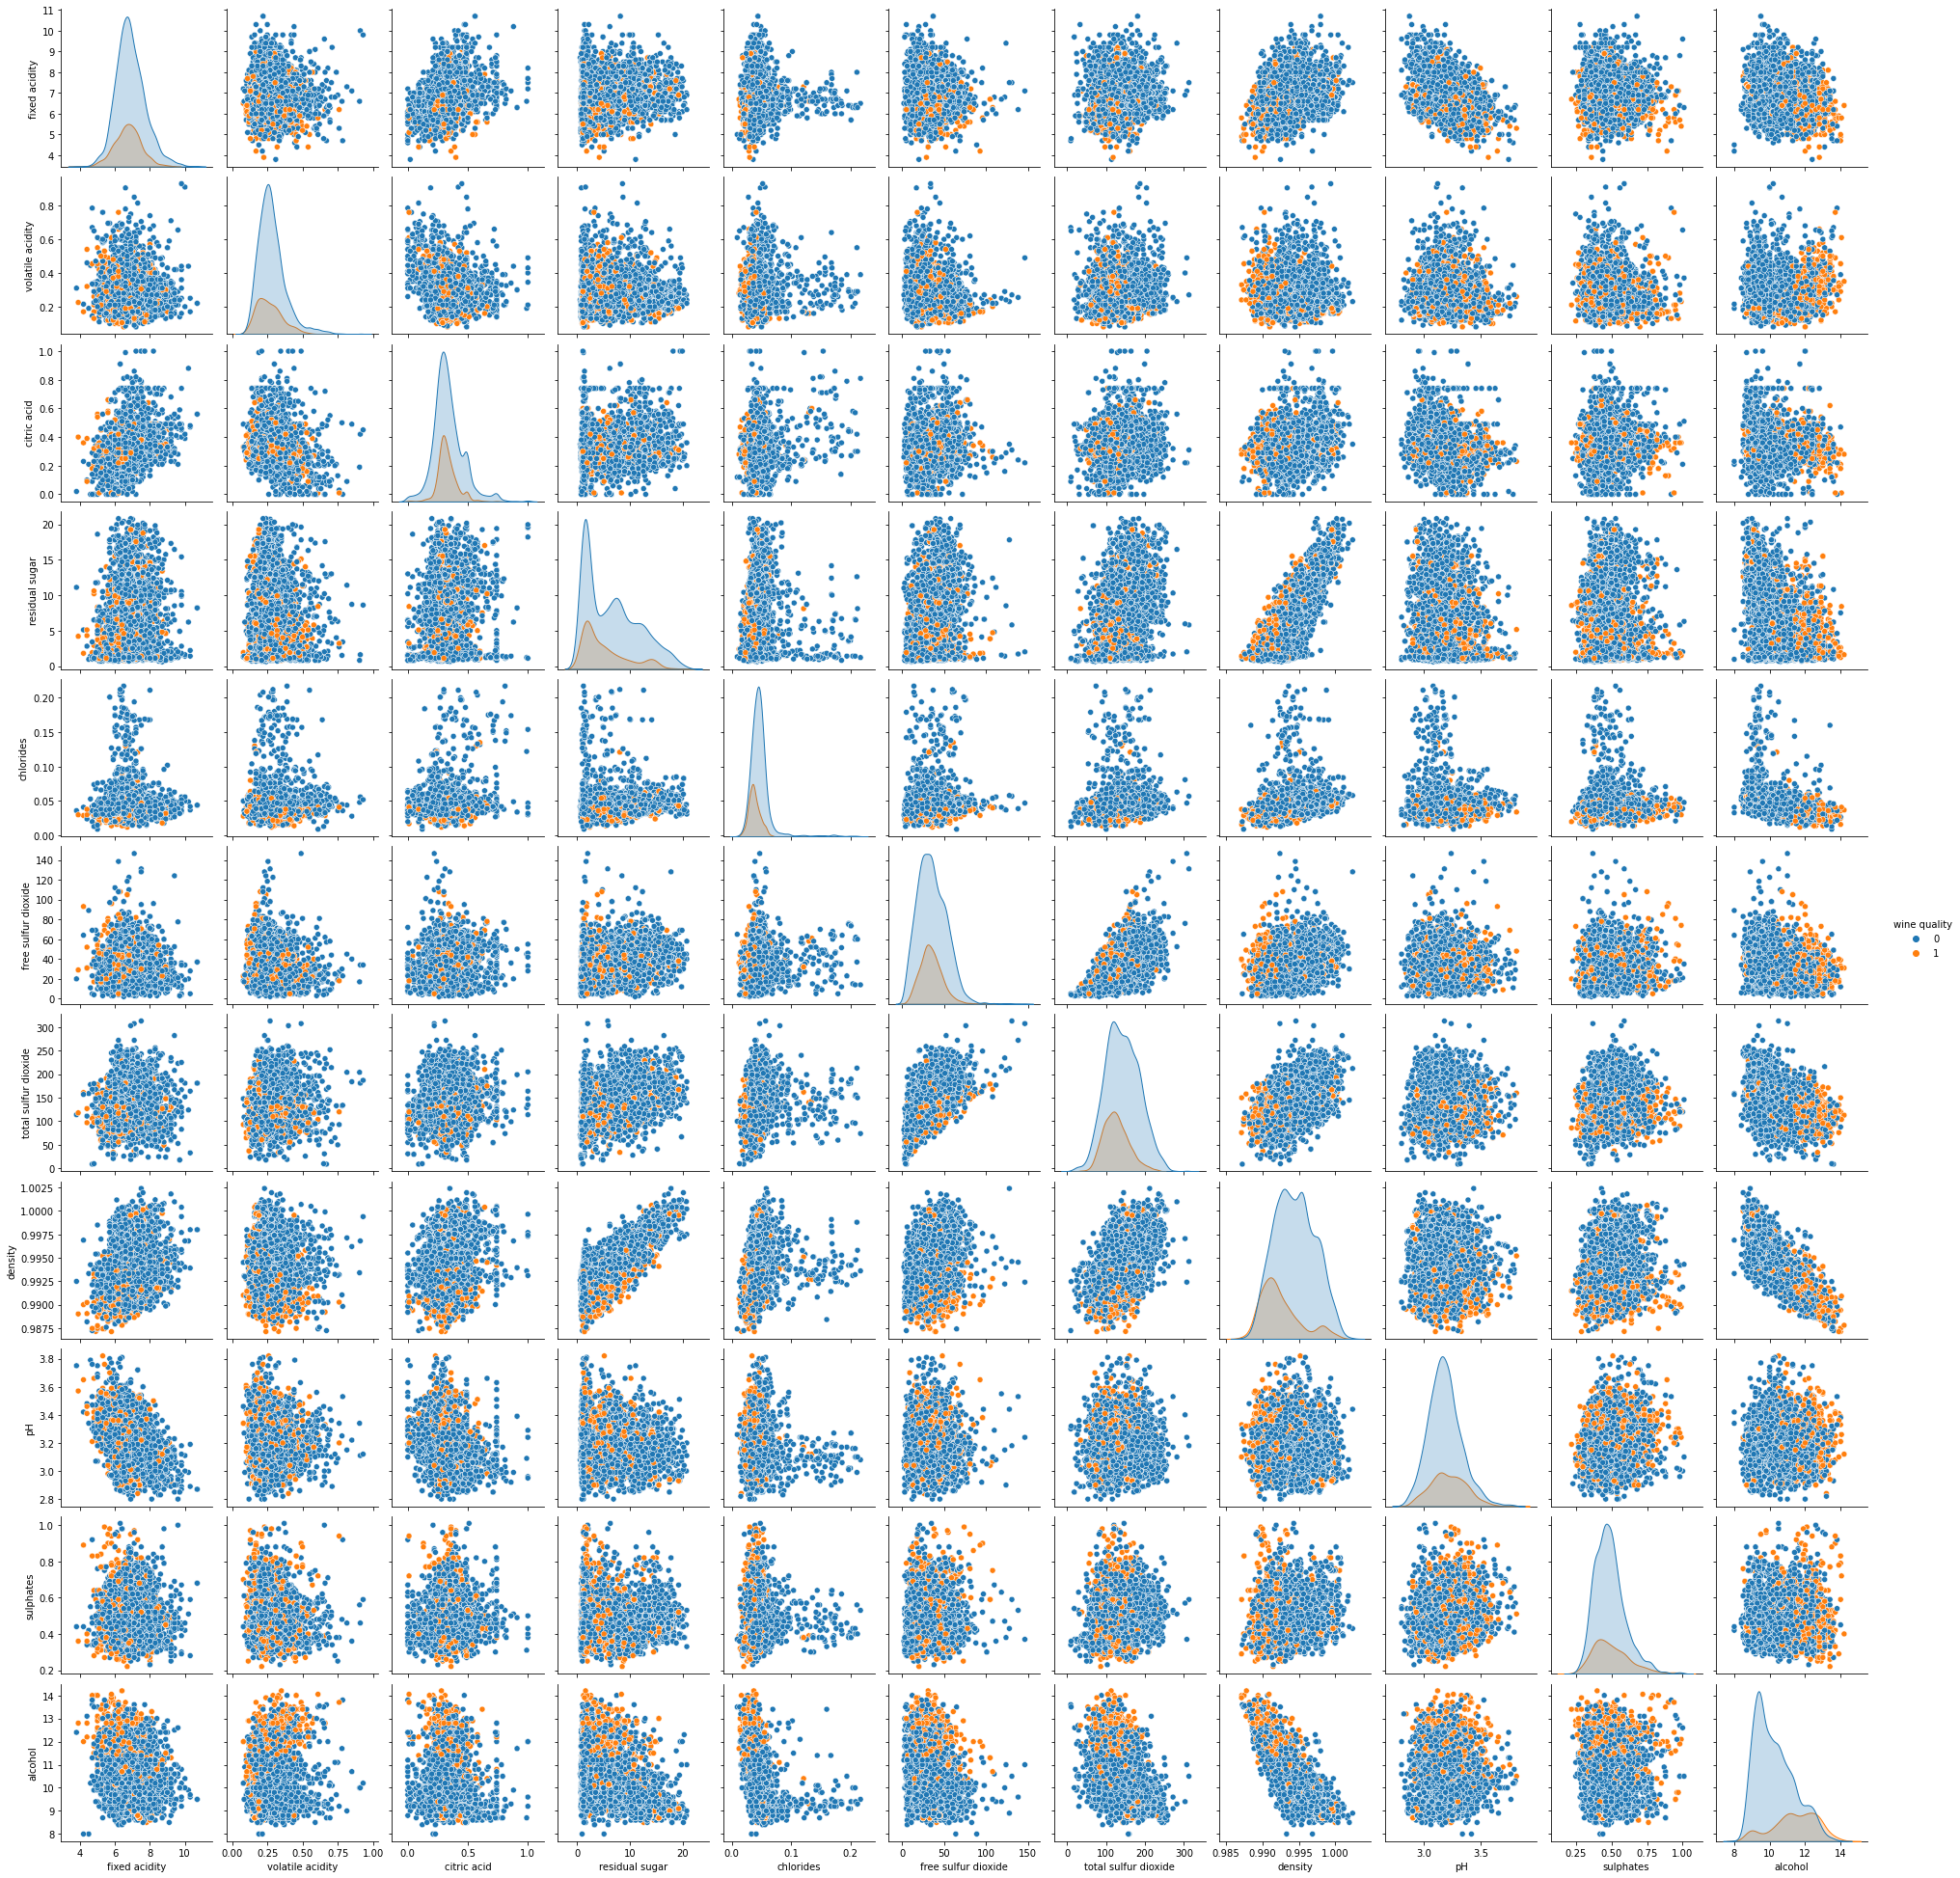

In [11]:
#check relationships between features
plt.figure()
pair=sns.pairplot(wine, hue='wine quality')
plt.show()

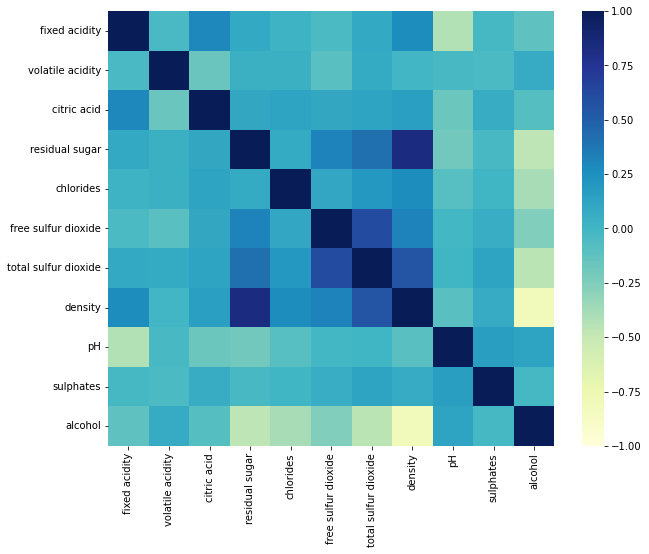

In [12]:
#creating a correlation heatmap using the pearson method to find correlation
#create subplot, title, color
plt.figure(figsize=(10,8))
#set heatmap color
color = plt.get_cmap('YlGnBu').copy()
#generate corr matrix
sns.heatmap(wine.corr(),vmin=-1, vmax=1, cmap=color)
plt.show()

Since this is a classification problem, correlation matrix does not include the wine quality class, therefore this tool can be used only for correlation between features. Feature selection for KNN algorithm will be done in Matlab.

In [13]:
#split train/test set
wine_train, wine_test = train_test_split(wine, test_size=0.20, random_state=42)

In [14]:
#split features and labels
Y=wine_train['wine quality']
X=wine_train.drop(columns='wine quality')

In [15]:
#perform SMOTE to fix class imbalance
sm = BorderlineSMOTE(random_state=42)
#resample
X_res, y_res = sm.fit_resample(X, Y)
X_res['wine quality'] = y_res
wine_train=X_res

Number of unique quality classes: 2


0    3046
1    3046
Name: wine quality, dtype: int64

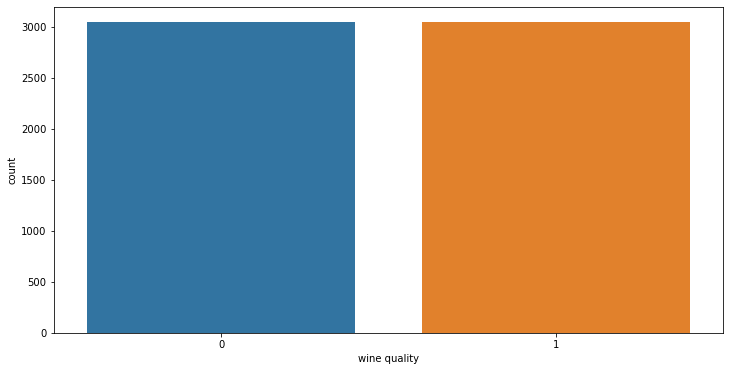

In [16]:
#check number of quality classes after SMOTE
print('Number of unique quality classes: '+str(wine_train['wine quality'].nunique()))
#get how many of each class
plt.figure(figsize=(12, 6))
sns.countplot(x="wine quality", data=wine_train);
wine_train['wine quality'].value_counts()

Class imbalance is fixed.

In [18]:
#output to continue to matlab
wine_train.to_csv('winequality_train.csv', index=False)
wine_test.to_csv('winequality_test.csv', index=False)